#Importig Libraries

In [1]:
import pandas as pd

# Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/CORPORATE CULTURE/trancripts_data.csv')

# Analyzing the data

In [5]:
data.head()

,company,quarter,year,transcript
0,A,2020Q1,2020,bringing them into Agilent. The BioTek leaders...
1,A,2020Q2,2020,"to taking your questions. And now, Bob you're..."
2,A,2020Q3,2020,el using digital tools continued to gain tract...
3,A,2020Q4,2020,"d talked about before. At one point in time, w..."
4,A,2021Q1,2021,emainder of the year? Because even in the firs...


In [6]:
data.shape

(13130, 4)

# Finding no of common companies for two given quarters

In [7]:
import pandas as pd

df = pd.DataFrame(data)

# Define the quarters to check
quarter1 = '2020Q4'
quarter2 = '2021Q1'

# Filter for each quarter and get unique companies
companies_q1 = df[df['quarter'] == quarter1]['company'].unique()
companies_q2 = df[df['quarter'] == quarter2]['company'].unique()

# Find common companies
common_companies = set(companies_q1).intersection(companies_q2)

# Convert to a list if needed
common_companies_list = list(common_companies)

# Display results
print(f"Common companies in {quarter1} and {quarter2}: {common_companies_list}")


Common companies in 2020Q4 and 2021Q1: ['VERX', 'CVET', 'AMRS', 'ABTX', 'BHLB', 'SPXC', 'INT', 'KVHI', 'ALX', 'MTH', 'SIX', 'HSY', 'RCI', 'XEL', 'EMR', 'SBRA', 'IAA', 'SPB', 'AAOI', 'FRC', 'SSRM', 'NGD', 'KTB', 'CRSR', 'GPC', 'CCI', 'GAN', 'RGNX', 'ENPH', 'SND', 'VCTR', 'PRTY', 'JAMF', 'NVGS', 'WHR', 'ECHO', 'MLCO', 'HMTV', 'WSFS', 'DIOD', 'BLFS', 'TRI', 'HNI', 'TNC', 'UBER', 'GEO', 'TSLA', 'BDSI', 'SUN', 'CARS', 'EGIO', 'PRI', 'TPIC', 'THG', 'DNB', 'BBSI', 'PRGO', 'SHW', 'ETN', 'MDLZ', 'ONTO', 'PCG', 'RHP', 'BLMN', 'MASI', 'TAC', 'CBT', 'SWAV', 'CCRN', 'TRIP', 'VFF', 'ASND', 'SPOK', 'SNBR', 'AR', 'CLW', 'NH', 'CFR', 'ATRO', 'EHTH', 'SSD', 'MC', 'LPLA', 'FMC', 'OCN', 'BUD', 'GSHD', 'VECO', 'ALRS', 'EIX', 'FWONA', 'PXD', 'KRC', 'OYST', 'GERN', 'TENB', 'OLN', 'LMT', 'CDNA', 'DTE', 'SPNS', 'DAL', 'WING', 'GTLS', 'BIGC', 'CLB', 'SFM', 'VIAO', 'CARA', 'HUN', 'IRTC', 'INMB', 'PDM', 'CSTE', 'IRT', 'SMTS', 'HBM', 'KEX', 'OII', 'EVER', 'TERP', 'TCMD', 'AWH', 'DENN', 'IPI', 'CR', 'PKG', 'CWT', '

In [8]:
len(common_companies)

1810

# Finding no of common comapnies for a given range of quarters

In [9]:
import pandas as pd


df = pd.DataFrame(data)

# Define the range of quarters
start_quarter = '2020Q1'
end_quarter = '2020Q4'

# Get the unique companies for each quarter in the specified range
unique_companies = {}
for quarter in pd.period_range(start=start_quarter, end=end_quarter, freq='Q'):
    companies = df[df['quarter'] == str(quarter)]['company'].unique()
    unique_companies[str(quarter)] = set(companies)

# Find common companies across all quarters in the range
common_companies = set.intersection(*unique_companies.values())

# Count and print the number of common companies
num_common_companies = len(common_companies)
print(f"Number of common companies from {start_quarter} to {end_quarter}: {num_common_companies}")


Number of common companies from 2020Q1 to 2020Q4: 155


# Filtering the DataFrame for the specified range of quarters

In [10]:
import pandas as pd

df = pd.DataFrame(data)

# Define the range of quarters
start_quarter = '2020Q1'
end_quarter = '2020Q4'

# Create a PeriodIndex for easier filtering
df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')

# Filter the DataFrame for the specified range
filtered_df = df[(df['quarter'] >= start_quarter) & (df['quarter'] <= end_quarter)]

# Sort the DataFrame by 'quarter' and then by 'company'
n_data = filtered_df.sort_values(by=['quarter', 'company']).reset_index(drop=True)



# TF-IDF

In [11]:
# Define word lists for each parameter
word_lists = {
    "innovation": [
        "creativity", "innovative", "innovate", "innovation", "creative", "excellence", "passion", "world-class", "technology", "operational_excellence", "passionate", "product_innovation", "capability", "customer_experience", "thought_leadership", "expertise", "agility", "efficient", "technology_innovation", "competency", "know-how", "cutting-edge", "agile", "creatively", "customer-centric", "enable",
        "value_proposition", "reinvent", "focus", "innovation_capability", "efficiency", "customer_value", "customer_intimacy", "competence", "user_experience", "create", "storytelling", "pride", "core_competency", "ingenuity", "technology_platform", "consumer_experience", "product_technology", "engineering_team", "differentiate", "powerful", "inspiring", "innovation_process", "transform", "product_team",
        "inspiration", "innovation_team", "technology_team", "best-in-class", "r&d_team",
        "loyalty", "truly", "technological", "differentiation", "technology_capability",
        "intellect", "focused", "design_capability", "product_development",
        "solve_customer_problem", "customer_focus", "inspire", "branding", "cut_edge",
        "business_process", "brand", "personalization", "distinctive", "cost-effective",
        "automation", "world_class", "harness", "efficiently", "domain_expertise",
        "product_development_capability", "cost-efficient", "core_capability",
        "consumer_insight", "platform", "engaging", "delight", "mass_customization",
        "uniqueness", "product_leadership", "customer_success", "specialization",
        "innovation_engine", "invent", "guest_experience", "innovator", "tool",
        "design_team", "craftsmanship", "seamlessness", "intellectual_property",
        "solve_problem", "incredible", "go-to-market", "service_experience", "enhance",
        "technology_standpoint", "sophistication", "excitement", "innovatively", "great",
        "business_model", "world-leading", "innovation_lab", "fanatical_support",
        "brand_management", "service_model", "go-to-market_capability", "customer_insight",
        "authentic", "discipline", "nimble", "effectiveness", "customer-oriented",
        "design_thinking", "execution", "mobile-first", "knowhow", "product_idea",
        "relentless", "r&d_capability", "importantly", "product_development_team",
        "customer-focused", "product_design", "showcase", "innovation_standpoint",
        "core_competence", "ai_technology", "excel", "develop", "effort", "responsiveness",
        "process_excellence", "building_capability", "technology_solution",
        "product_capability", "execution_capability", "critically_important", "solution",
        "heritage", "simplicity", "cohesive", "scalability", "intelligent", "curation",
        "process_improvement", "intimacy", "user_interface", "r&d_organization",
        "best-in-breed", "core_technology", "analytic", "domain_knowledge", "creativeness",
        "client_experience", "technology_perspective", "invention", "cost_efficiency",
        "technologically", "core_strength", "award-winning", "learn", "merchandising",
        "marketing_team", "ethos", "optimize", "awareness", "technology_leadership",
        "game_team", "leadership_position", "engineering_capability",
        "leverage_technology", "feature_functionality", "brand_equity", "smarter",
        "enabler", "dna", "operating_platform", "computer_graphic", "service_excellence",
        "marketing_idea", "service_delivery_platform", "artistic",
        "product_development_process", "ability", "reimagine", "platform_capability",
        "democratize", "end-to-end", "forefront", "connectedness", "customer_interface",
        "datum_analytic", "innovation_perspective", "r&d_department", "take_cost_out",
        "reengineer", "workflow", "center_excellence", "marketing_technology", "relevancy",
        "unparalleled", "content", "successful", "smart", "technology_architecture",
        "process_innovation", "authenticity", "scalable", "vision", "marketer",
        "visual_merchandising", "brand_experience", "productivity", "technology-enabled",
        "terrific", "easy-to-use", "product_experience", "coherence", "product_management",
        "machine_learning_ai", "leadership_product", "industry_leadership", "simplify",
        "science", "versatility", "artificial_intelligence", "packaging_solution",
        "intellectual", "datum_science", "best-of-breed", "attract", "adaptability",
        "r&d_group", "drive_innovation", "delivery_platform", "succeed", "modern",
        "state-of-the-art", "immersive", "information_technology", "engineering_skill",
        "r&d_community", "transformation", "ease-of-use", "design",
        "category_management", "technology_base", "business_system", "unique",
        "application_expertise", "video_technology", "product_creation",
        "breakthrough_technology", "teaching", "innovation_technology", "delivery_system",
        "breadth_depth", "architecture", "marketing_capability", "visual",
        "world_class_product", "technology-driven", "internally_externally",
        "delivery_model", "consumer_engagement", "success", "rapid_prototyping",
        "customer_centricity", "information-based", "problem_solver",
        "delivery_organization", "video_experience", "globalize", "product_excellence",
        "problem-solving", "machine_learning", "product_offering", "marketing_expertise",
        "social_media", "customer_loyalty", "design_expertise", "personalized",
        "unique_selling_proposition", "marketing_skill", "enablement", "product_developer",
        "service_leader", "engineering_organization", "usability",
        "technology_development", "manufacturing_engineering", "innovativeness",
        "leadership_model", "technology_organization", "entertainment_experience",
        "imaginative", "product_differentiation", "resourceful", "search_capability",
        "consumer-centric", "creator", "brand_recognition", "shopping_experience",
        "innovation_center", "breakthrough_innovation", "knowledge-based",
        "design_standpoint", "knowledge_management", "content_creation", "secret_sauce",
        "core_business_process", "multi-channel", "software_team", "software_engineering",
        "distinctiveness", "store_environment", "imperative", "compelling", "globalization",
        "customer_relationship_management", "product_development_system",
        "core_value_proposition", "product_functionality", "operation_excellence",
        "prowess", "resonate", "fabulous", "technology-based", "process_management",
        "newness", "exciting", "clever", "restaurant_experience", "recipe",
        "marketing_tool", "supply_chain_approach", "technology_differentiation", "proven",
        "storyteller", "devops", "inventive", "architect", "product_solution",
        "deep_domain_expertise", "technology_leader", "engineering_expertise", "amazing",
        "solution_capability", "engineering_talent", "innovation_side",
        "application_knowledge", "consumer_understanding", "experiential",
        "solve_business_problem", "fantastic", "brand_name", "service_culture",
        "brand_building", "search_technology", "testament", "unifying", "organizations",
        "workspace", "foundation", "brand_identity", "inventiveness", "brand_positioning",
        "integrated", "wonderful", "fanatical", "best", "messaging", "mastery", "fun",
        "self-expression", "store_experience", "first-rate", "elegance",
        "marketing_excellence", "content_experience", "beautiful", "consulting_expertise",
        "operating_skill", "brain_power", "taste", "inspirational", "hallmark", "superb"
    ],

# You can add the words for the remaining parameters (integrity, quality, respect

    "integrity": [
        "accountability", "ethic", "integrity", "responsibility", "transparency",
        "accountable", "governance", "ethical", "transparent", "trust", "responsible",
        "oversight", "independence", "objectivity", "moral", "trustworthy", "fairness",
        "hold_accountable", "corporate_governance", "autonomy", "core_value", "assure",
        "stakeholder", "fiduciary_responsibility", "continuity", "credibility", "honesty",
        "privacy", "fiduciary_duty", "rigor", "empathy", "ethic_integrity", "egalitarian",
        "fiduciary", "utmost", "code_ethic", "faith", "passionately", "impartial",
        "compliance", "honorable", "socially_responsible", "ethically", "company_culture",
        "solidarity", "democracy", "stewardship", "identity", "constituent",
        "governance_model", "citizen", "scrupulous", "society", "governance_structure",
        "safety_soundness", "humility", "decency", "meritocracy", "reassure", "exemplary",
        "business_ethic", "act_responsibly", "advocacy", "controllership", "diligent",
        "sincerity", "satisfaction", "supervision", "consistency", "value_system",
        "delegate", "advocate", "fiduciary_obligation", "philanthropy", "risk_control",
        "empathetic", "advice", "safety_culture", "risk_management", "business_conduct",
        "unbiased", "principled", "rigorous", "candid", "principle", "humble",
        "eat_cooking", "banking_supervision", "risk_oversight", "condone", "correctness",
        "science-based", "skin_game", "equality", "preach", "compassion", "adhere",
        "management_style", "consumer_protection", "religious", "credo", "citizenship",
        "governance_standpoint", "management", "executive_committee", "seriousness",
        "probity", "executive_board", "governance_process", "sincere", "management_board",
        "counsel", "rigor_discipline", "safety_environment", "assurance", "candor",
        "compliance_team", "well-informed", "elect_official", "corrupt", "mindset",
        "pragmatic", "anonymity", "onus", "business_practice", "thoughtful",
        "board_oversight", "evidence-based", "meticulous", "crime", "patient_safety",
        "committee", "risk_committee", "finance_department", "traceability",
        "mission_statement", "spirit", "paternalistic", "freedom", "governance_rule",
        "high-integrity", "quality_assurance", "policymaker", "risk_organization",
        "credible", "audit_committee", "quality_management_system", "shareholder_community",
        "policy_maker", "governance_perspective", "custodian", "governance_system",
        "faithful", "instruct", "wellintended", "supervise", "communication_style",
        "regulator", "instil", "authorship", "paramount_importance", "compliance_program",
        "convince", "unwavering_commitment", "honest", "institutionalize", "courage",
        "insist", "governance_practice", "community_member", "governance_framework",
        "nonpartisan", "proper", "honor", "secrecy", "bureaucrat", "risk_management_function",
        "abide", "frugality", "performance_culture", "safeguard", "community_standard",
        "steadfast", "level_playing_field", "conformity", "forthright", "deserve",
        "thoughtfulness", "board_director", "decentralize", "control", "moral_obligation",
        "finance_team", "instill", "sovereignty", "well-intentioned", "comply",
        "convincing", "misconduct", "zeal", "applaud", "democratic", "quality_organization",
        "fact-based", "frustration", "decision_rights", "harm", "constitutionally",
        "oversight_responsibility", "conscience", "government_regulator", "authority",
        "bureaucracy", "responsibly", "unethical", "trustworthiness", "esteem", "safety",
        "supervisory", "journalism", "council", "expert", "mantra", "audit_function",
        "genuinely", "adhering", "responsive", "govern_body", "hands-off", "decentralized",
        "diligence", "disinterested", "conflict-free", "disciplined", "confidentiality",
        "oversight_committee", "company_management", "adherence", "motivation",
        "quality_care", "governance_standard", "in-charge", "business-like", "dishonest",
        "caretaker", "compliance_department", "paramount", "employee_engagement",
        "core_principle", "judiciary", "management_discipline", "team-oriented",
        "suitability", "thoroughness", "information_flow", "management_approach",
        "compliance_function", "impeccable", "overseer", "thorough", "unequivocally",
        "nondiscrimination", "politician", "harmonized", "strict", "embarrassment",
        "board_function", "enforce", "business_principle", "steward", "operation_council",
        "compliance_aspect", "vested_interest", "governance_issue", "prescriptive",
        "attentive", "risk_manager", "subcommittee", "inculcate", "resolute", "reproach",
        "safety-first", "risk_management_group", "management_committee",
        "nominating_committee", "safety_management", "unequivocal", "management_philosophy",
        "reputable", "keen", "reputational_risk", "individualistic", "metrics-driven",
        "authoritative", "governmental_agency", "wisdom", "procurement_department",
        "demonize", "insistence", "law-abiding", "resourcefulness", "proprietor",
        "money_laundering", "ingrained", "harassment", "customer_champion",
        "brand_champion", "communicative", "franchisor", "bureaucratic", "advice_counsel",
        "stakeholder_management", "entrust", "shareholder_interest", "police", "unselfish",
        "suasion", "courteous", "vouch", "visionary", "intellectually_honest", "derelict",
        "sincerely", "corruption", "conflict", "remuneration_committee", "legitimacy",
        "prudence", "acutely_aware", "legislator", "informed", "investment_community",
        "wholeheartedly", "ombudsman", "dictatorship", "core_responsibility", "unanimously",
        "ego", "sympathetic", "journalistic", "careful", "illegality", "conscientious",
        "obsessive", "stand_up", "governing_council", "litigator", "renown", "seriously",
        "honestly", "partisan", "truth", "humbly", "reprehensible", "praise",
        "disrespect", "let_you_down", "criticism", "irresponsible", "arrogant", "candidly"
    ],
    "quality": [
        "dedicated", "quality", "dedication", "customer_service", "customer",
        "dedicate", "service_level", "mission", "service_delivery", "customer_satisfaction",
        "service", "reliability", "commitment", "customer_need", "customer_support",
        "high-quality", "ensure", "customer_relationship", "quality_service",
        "product_quality", "quality_product", "capable", "service_quality", "end_user",
        "quality_level", "customer_expectation", "service_capability", "client",
        "customer_requirement", "sla", "support", "customer_commitment", "vendor_partner",
        "service_standard", "service_team", "operation_team", "quality_standard",
        "mission-critical", "customer_care", "customer_solution", "deliver",
        "customer_engagement", "support_team", "service_level_agreement", "connectivity",
        "customer_demand", "system_engineer", "commit", "service_offering",
        "service_support", "service_organization", "channel_partner", "product",
        "service_product", "customer_base", "vendor", "service_management", "supplier",
        "network", "service_requirement", "brand_promise", "customer_team", "specialize",
        "application_solution", "serve", "customer_service_organization", "end_customer",
        "customer_support_people", "speed", "it_team", "service_people", "field",
        "delivery_people", "quality_control", "delivery_capability", "desire",
        "delivery_team", "customer_contact", "customer-facing", "account_team",
        "top-quality", "customize", "customization", "specification", "guest",
        "customer_service_level", "support_capability", "it_department", "skill_building",
        "high-touch", "help_desk", "support_organization", "end-user", "service_commitment",
        "engineering_support", "critical", "enterprise-class", "implementation_team",
        "field_technician", "service_proposition", "high-value", "it_governance",
        "service_personnel", "supply_chain", "solution_set", "application_engineer",
        "service_representative", "security_operation_center", "quality_management",
        "tailor", "professional_service_team", "product_management_team", "breadth",
        "workload", "service_provider", "infrastructure", "customer_interaction",
        "build", "sale_support", "work_flow", "specialized", "project_management",
        "customer_site", "quality_delivery", "application_support",
        "consulting_organization", "functionality", "high-performance", "friendliness",
        "brand_partner", "customer_relation", "shop_floor", "field_application_engineer",
        "service_aspect", "uptime", "classroom_experience", "on-time_delivery",
        "sale_engineering_team", "customer_training", "devotion", "program_management",
        "professional_service_organization", "quality_work", "task", "tireless",
        "deployment_team", "call_center_agent", "application_people", "specialist",
        "enduser_customer", "enterprise-grade", "solution_center", "service_engineer",
        "security_specialist", "engineering_resource", "deliver_it_out",
        "customer_service_rep", "field_service_engineer", "delivery_performance",
        "customer_service_experience", "service_need", "quality_aspect", "product_spec",
        "requirement", "field_sale_organization", "sale_management", "maintenance_team",
        "customer_request", "application_engineering", "supplier_quality",
        "end-to-end_solution", "service_automation", "sale_floor", "bandwidth",
        "productive", "locally", "sale_machine", "seamless", "it_capability",
        "selling_skill", "war_fighter", "installation_team", "relationship_management",
        "carrier_partner", "proficiency", "sale_engineer", "logistics", "product_specialist",
        "system_requirement", "back_they_up", "client_interface", "account_management",
        "quality_system", "application_integration", "customer_orientation",
        "automation_capability", "sale_force", "customer_delivery", "essential",
        "product_service", "project_team", "turnkey_solution", "product_training",
        "mission_critical_application", "custom_solution", "field_application",
        "service_element", "solution_team", "retrain", "on-site", "r&d_people",
        "sale_effort", "implementation_capability", "customer_engineer",
        "service_specialist", "customer_application", "customer_service_solution",
        "business_outcome", "assemble", "customer_service_group", "network_team",
        "devoted", "delivery", "engineering_department", "tech_support", "mission_critical",
        "management_support", "business_team", "quality_expectation", "business_need",
        "manpower", "client_service_team", "work_type", "support_structure",
        "aftermarket_support", "system_engineering", "it_infrastructure",
        "manufacturing_team", "quality_support", "it_solution", "manufacturing_capability",
        "certification_program", "mobility_solution", "deliverable", "architecture_team",
        "fulfillment", "process_capability", "customer_spec", "supply_chain_logistics",
        "partner_enablement", "it_operation", "project_management_skill",
        "integration_service", "market_requirement", "support_infrastructure",
        "market-facing", "manufacturing_organization", "market_need",
        "meeting_customer", "service_reliability", "system_support", "technology_requirement",
        "guest_need", "supply_chain_requirement", "client_requirement",
        "engineering_requirement", "client_need", "reliability_requirement",
        "guest_expectation"
    ],
    "respect": [
        "talented", "talent", "empower", "team_member", "employee", "team",
        "leadership", "leadership_team", "culture", "teammate", "organization",
        "entrepreneurial", "skill", "executive", "empowerment", "management_team",
        "best_brightest", "professionalism", "staff", "highly_skilled", "skill_set",
        "technologist", "competent", "entrepreneur", "experienced", "energize",
        "entrepreneurial_spirit", "high-caliber", "manager", "leadership_skill",
        "management_group", "motivated", "executive_team", "senior_executive",
        "deep_bench", "employee_base", "leader", "business_acumen", "career_path",
        "sale_professional", "motivate", "management_people",
        "human_resource_department", "dignity", "entrepreneurship", "quality_people",
        "senior-level", "talent_pool", "scientist", "work_ethic", "it_professional",
        "leadership_talent", "well-trained", "technology_people", "athlete", "veteran",
        "workforce", "highly_motivate", "field_organization", "it_people", "talent_base",
        "personality", "recruit", "knowledgeable", "hard-working", "top-notch",
        "business_leader", "leadership_level", "co-worker", "stylist", "management_skill",
        "mentor", "management_talent", "store_manager", "ambassador", "reputation",
        "culturally", "faculty", "professionally", "branch_staff", "leadership_group",
        "bench_strength", "designer", "career_opportunity", "organisation",
        "sale_executive", "subject_matter_expert", "skillset", "subject_matter_expertise",
        "people", "relationship_manager", "frontline_employee", "top-flight",
        "team_approach", "proud", "domain_expert", "investment_professional",
        "senior_leadership_team", "salespeople", "sale_leader", "caliber",
        "project_manager", "sale_team", "mentorship", "founder", "business_people",
        "respectful", "sale_organization", "operating_team", "development_team",
        "work_force", "industry_expertise", "re-skill", "sale_people", "energetic",
        "business_professional", "credentials", "relationship_management_team",
        "workplace", "core_team", "coach", "datum_scientist", "team_player",
        "work_environment", "nurture", "senior_officer", "hardworking", "trainer",
        "company_employee", "caring", "team_leader", "folk", "account_management_team",
        "practice_leader", "coaching", "camaraderie", "morale", "software_developer",
        "staff_member", "consultant", "skilled", "sale_associate", "trained",
        "coworker", "admire", "brand_ambassador", "cultural", "fellow", "railroader",
        "executive_talent", "training", "servant", "officer", "field_people",
        "highly-skilled", "training_program", "health_enthusiast", "seasoned_experienced",
        "mentoring", "store_team", "store_manager_district_manager", "client_service",
        "field_team", "train_they_up", "leadership_development", "editorial_team",
        "department_head", "finance_organization", "marketing_manager", "well-skilled",
        "cast_member", "executive_level", "field_leader", "sale_management_team",
        "management_staff", "client-facing", "well-educated", "member", "director-level",
        "hire", "managing_director", "relationship_banker", "adviser", "crew_member",
        "educate", "sale_folk", "assistant", "teacher", "c_suite", "leadership_standpoint",
        "branch_manager", "cultural_fit", "respected", "train", "banker", "grateful",
        "well-experienced", "advisor", "product_manager", "program_manager",
        "district_manager", "accomplished", "selling_organization", "sale_skill",
        "compliance_officer", "recruiting_organization", "investment_team",
        "long-tenured", "technician", "talent_people", "leadership_capability",
        "highly-talented", "decision_maker", "skill_level", "person", "cadre", "army",
        "operation_staff", "district_sale_manager", "labor_leader", "communication_skill",
        "leadership_role", "caregiver", "senior", "field_sale_people", "marketing_person",
        "proven_track_record", "project_leader", "management_organization",
        "people_development", "appreciative", "salesforce", "insurance_professional",
        "field_leadership", "cio", "business_experience", "business_development_people",
        "recruiting_team", "recruiting", "service_professional", "aptitude", "profession",
        "privilege", "product_knowledge", "field_leadership_team", "thankful", "champion",
        "account_manager", "engineer", "full-time", "engineering_people",
        "general_managers", "platform_president", "knowledge_base", "businesspeople",
        "seasoned_executive", "c-level", "vp_level", "interior_designer",
        "customer_service_team", "resource", "leadership_quality", "bring_people_in",
        "investment_talent", "teach", "store_employee", "technology_folk", "accenture",
        "plant_manager", "vice_presidents", "board_member", "product_people",
        "service_mentality", "sale_manager", "tribute", "team_building", "management_member",
        "hands-on", "marketing_people", "work_experience", "field_manager", "acumen",
        "account_executive", "datum_analyst", "mid-career", "lieutenant",
        "front_line_employee", "director", "supervisor", "spokespeople", "charismatic",
        "knowledge_worker", "marketing_staff", "well-respected", "staff_people",
        "field-based", "credential", "young", "filmmaker", "train_up", "country_manager",
        "account_representative", "marketing_organization", "executive_leadership",
        "engineering_school", "community_leader", "freelancer", "results-oriented",
        "compliance_organization", "restaurant_manager", "reward", "company",
        "business_development_folk", "development_organization", "hard-charging",
        "crewmember", "administrator", "succession_planning", "decision-maker",
        "executive_management_team", "ceo", "cross-trained", "employee_group",
        "c-suite", "researcher", "client_team", "team_structure", "people_business",
        "knowledge_transfer", "senior_management", "employer", "inspired",
        "career_pathing", "it_organization", "senior_management_group",
        "country_management", "customer_organization", "team_effort",
        "regional_vice_president", "compliment", "customer_service_department",
        "director_level", "leadership_style", "evangelist", "rapport",
        "customer_service_representative", "brand_manager", "business_culture",
        "engineering_community", "mentor", "spiritual", "customer_service_people",
        "store_organization", "marketing_consultant", "network_engineer", "sales-oriented",
        "executive_management", "security_professional", "reskill", "product_expert",
        "people_skill", "business_analyst", "business_executive", "selling_team", "loyal",
        "educator", "line_manager", "bless", "planner", "restaurant_general_manager",
        "ceo_level", "employee_team", "sale_department", "training_group", "first-class",
        "field_management", "high-performing", "operating_committee", "mid-management",
        "distributor_organization", "line_people", "deal_maker", "ceo_cfo", "people_culture",
        "invaluable", "advisory_council", "store_director", "bank_manager",
        "health_care_professional", "town_hall", "operating_manager", "rank-and-file",
        "can-do", "family_member", "values-based", "well-versed", "constituency",
        "knowledge", "team-based", "indoctrinate", "immerse", "train_master",
        "business_manager", "gender_equality", "mission-driven", "training_organization",
        "customer_community", "boardroom", "esprit_de_corps", "business_community",
        "comradery", "motivational", "rewarding", "fellow_board_member", "role_model",
        "oversee", "kindness", "admiration", "channel_organization", "grown-up"
    ],
    "teamwork": [
        "collaborate", "cooperation", "collaboration", "collaborative", "cooperative", "partnership", "cooperate", "collaboratively",     "partner", "co-operation", "coordination", "engage", "jointly",
        "coordinate", "teamwork", "business_partner", "alliance",
        "team_up", "technology_partner", "joint", "cooperatively",
        "relationship", "collaborator", "interaction",
        "working_relationship", "co-operate", "technology_partnership",
        "association", "dialogue", "dialog", "collegial",
        "information_sharing", "co-selling", "business_relationship",
        "partnering", "involvement", "mutually_beneficial", "unite",
        "organize", "partnership_way", "cross-functional", "interact",
        "embrace", "win-win", "alignment", "co-market", "join_up",
        "joint_development_committee", "mutually", "technology_provider",
        "consortium", "bring_together", "reach_out", "work_relationship",
        "marketing_partner", "joint_steering_committee", "communication",
        "partner_up", "academic_collaborator", "openness", "co-develop",
        "industry_partner", "interface", "collegiality",
        "constructive_dialogue", "collaboration_partner", "harmonious",
        "partnership_relationship", "actively_engage", "co-marketing",
        "federation", "ecosystem", "co-development", "interoperability",
        "like-minded", "co-creation", "link_up", "consortia", "outreach",
        "engagement", "co-operative", "ecosystem_partner",
        "co-development_relationship", "supportive",
        "trade_association", "co-sell", "industry_organization",
        "standard_body", "integrate", "partnership_approach",
        "technology_collaboration", "foster", "development_partner",
        "development_relationship", "development_partnership",
        "win/win", "symbiotic_relationship", "contact", "group_file",
        "partnership_basis", "co-work", "assist",
        "technology_exchange", "supplier_partner", "co-create",
        "cooperation_agreement", "building_relationship",
        "research_institute", "engagement_model", "innovation_group",
        "research_organization", "pioneering", "government_partner",
        "constructive_dialog", "technology_sharing", "together_with",
        "implementation_partner", "consultation", "collaboration_model",
        "application_provider", "think_tank", "business_agreement",
        "business_collaboration", "brainstorm", "key_opinion_leader",
        "service_partner", "auspices", "co-venture",
        "distribution_partnership", "technology_relationship",
        "tripartite", "isv_partner", "partnership_arrangement",
        "sharing", "liaison", "dealings", "study_group", "codevelopment",
        "datum_exchange", "commercialization_partner",
        "open_source_community", "joint_development_agreement",
        "long-standing_relationship", "platform_partner",
        "funding_organization", "umbrella_organization",
        "technology_vendor", "steer_committee", "unify",
        "knowledge_sharing", "consultative", "mutual",
        "constructively", "system_integrator",
        "research_institutes", "supply_partner", "federate",
        "multi-stakeholder", "involve", "technology_transfer",
        "facilitator", "advocacy_group", "sit_down", "orchestrate",
        "revenue_integration", "collaboration_program", "unified",
        "media_partner", "coalition", "patient_advocacy_group",
        "crada", "sponsor", "alliance_partner", "self-trafficking",
        "marketing_partnership", "thought_leader", "interoperate",
        "alliance_management", "partnership_opportunity", "explore",
        "innovation_partner", "interoperable",
        "collaboration_agreement", "core_partner", "co-innovate",
        "partner_company", "antitrust_immunity", "instrumental",
        "regulatory_authority", "system_integration_partner",
        "team_work", "co-market", "union_leadership", "marriage",
        "standardize", "partner_organization",
        "co-development_project", "research_laboratory",
        "device_partner", "mutually-beneficial",
        "worker_representative", "cross-business-unit",
        "software_partner", "exchange_information",
        "technology_agreement", "co-development_arrangement",
        "pioneer", "discussion", "co-develop", "align", "licensor",
        "venture_organization", "commercialization_deal",
        "information_exchange", "psychiatry_division",
        "cross-fertilization", "academic_institution", "union",
        "marketing_relationship", "put_together", "program_office",
        "game_developer", "platform_technology", "partner_community",
        "ad_hoc_type", "collaboration_effort", "endorsement", "merge",
        "distribution_partner", "management_consulting_firm",
        "partnering_relationship", "development_group",
        "help_each_other_out", "concert", "engagement_process",
        "partnership_kind", "demonstration", "investigate",
        "shoulder_shoulder", "forward-thinking",
        "contract_research_organization", "government_agency",
        "engineering_level", "trade_group", "engineering_group",
    "work_along", "labor_organization", "supply_chain_partner", "research_center", "formalize", "pharma_partner", "platform_partnership", "cultivate", "ministry", "integration", "transition_team", "implementer", "co-development_partner","platform_provider", "symbiosis", "comarket", "integrative", "ownership_relationship", "sister_company", "regulatory_body", "integration_team", "technology_integration", "opendaylight", "solution_partner", "industry_partnership", "symbiotic", "two-way_street", "aboriginal", "cooperation_partner", "open-sourcing", "developer_framework", "cross-functionally", "developer_partner", "device_manufacturer", "go-to-market_partnership", "community_group", "content_owner", "formal_informal", "business_arrangement", "collaboration_opportunity", "marketeer", "friendship", "customer_relationship_model", "facilitate", "co-promotion", "co-fund", "industry_association", "real_estate_partner", "cordial", "corroboration", "operationalize", "marketing_alliance", "cochair", "renowned", "provider_community", "integrator", "university", "technology_alliance", "infrastructure_provider", "co-share", "pathology_group", "document_management_solution", "private-public", "coordinator", "probe_audit", "integration_partner", "home_infusion_provider", "consortium_member", "integrator_partner", "software_provider", "partner_team", "worldrenowned", "harmonize", "government_official", "alliance_relationship", "fruitfully", "conduct", "joint_venture_relationship", "intimately_involve", "assistance", "sale_partner", "co-prime", "copartner", "collaboration_basis", "system_integration_community", "group_affiliate", "fruitful", "co-opetition", "validation", "together", "idea_generation", "corporation_agreement", "health_authority", "deepen_relationship", "partnership_relation", "research_agreement", "onestop-shop", "task_force", "on_behalf_of", "enlist", "individualism", "leadership_potential", "delivery_system_model", "conjunction", "business_partnership", "technology_firm", "chipset_vendor", "newspaper_consortium", "conversation", "engagement_team", "content_provider", "partnership_work", "investigator", "lead_vendor", "marketing_agreement", "collaborate_on", "base_band_partner", "patient_organization", "arm_length", "cross_pollinate", "harmony", "independently", "signing_agreement", "worker_council", "hand_glove", "confrontation", "utility_partner", "amicable"]
}


# Function to apply TF-IDF to our processed dataset

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Remove duplicates from each word list
for parameter, word_list in word_lists.items():
    word_lists[parameter] = list(set(word_list))

# Function to calculate TF-IDF scores for a given text
def calculate_tfidf(text, word_lists):
    all_words = list(set([word for sublist in word_lists.values() for word in sublist]))
    vectorizer = TfidfVectorizer(vocabulary=all_words)
    tfidf_matrix = vectorizer.fit_transform([text])
    tfidf_scores = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out(), columns=["tfidf"])
    return tfidf_scores

# Function to process each row in the dataset and compute TF-IDF values
def process_transcripts(data):
    # Create a list to store results
    results = []

    # Iterate through each row in the dataset
    for index, row in data.iterrows():
        transcript = row['transcript']  # Adjust column name if needed

        # Calculate TF-IDF scores for the transcript
        tfidf_scores = calculate_tfidf(transcript, word_lists)

        # Calculate the combined TF-IDF value for each cultural parameter
        row_result = {

            'company': row['company'],
            'quarter': row['quarter'],
            'year': row['year'],
            'transcript': transcript
        }

        for parameter in word_lists.keys():
            combined_tfidf = tfidf_scores.loc[word_lists[parameter], 'tfidf'].sum()
            row_result[parameter] = combined_tfidf

        # Append the results to the list
        results.append(row_result)

    # Convert the list of results to a DataFrame
    result_df = pd.DataFrame(results)
    return result_df

# Call the function to process transcripts and create a DataFrame
final_df = process_transcripts(n_data)

In [13]:
# Display the resulting DataFrame
final_df.head()

,company,quarter,year,transcript,innovation,integrity,quality,respect,teamwork
0,A,2020Q1,2020,bringing them into Agilent. The BioTek leaders...,0.713812,0.054909,0.384360,2.070054,0.071381
1,AAIC,2020Q1,2020,Prepared Remarks:\nOperator\nGood morning. I l...,0.653089,0.029686,0.474974,1.795996,0.089058
2,AAPL,2020Q1,2020,ue to make all the necessary investments also ...,1.476916,0.160285,1.087652,1.728794,0.228979
3,AAWW,2020Q1,2020,aircraft if it's differently now versus a nor...,0.401667,0.154487,0.455738,1.846124,0.247180
4,ABMD,2020Q1,2020,"icated or requires biventricular support, they...",1.919474,0.365614,1.279650,1.584328,0.228509


# Saving or data

In [14]:
final_df.to_csv('5_cultural_values.csv', index=False)

# Plotting the change in cultural values over the quarters

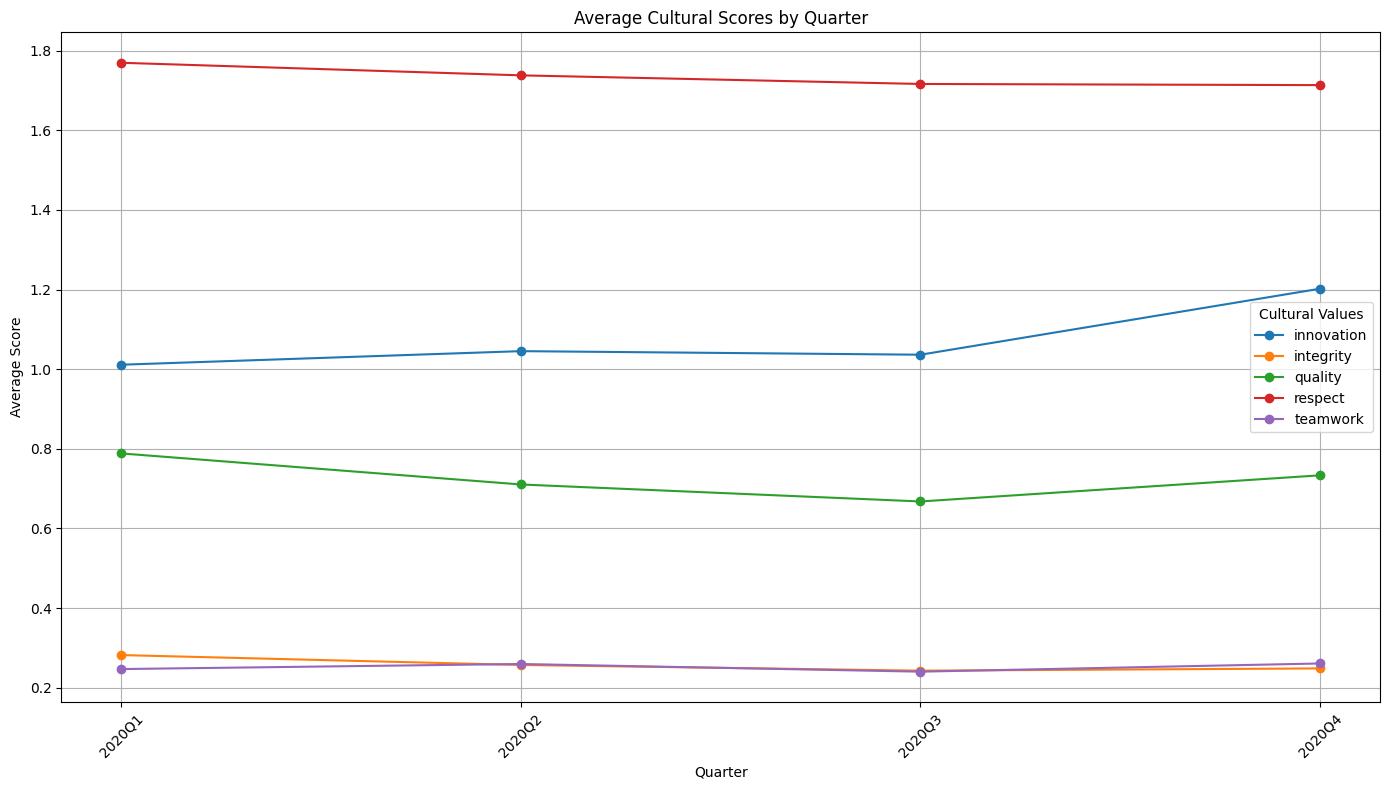

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame
data = final_df.copy()
df = pd.DataFrame(data)

# Convert 'quarter' from Period to string for plotting
df['quarter'] = df['quarter'].astype(str)

# Calculate average scores for each cultural value by quarter
average_scores = df.groupby('quarter')[['innovation', 'integrity', 'quality', 'respect', 'teamwork']].mean().reset_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a list of cultural scores to plot
cultural_scores = ['innovation', 'integrity', 'quality', 'respect', 'teamwork']

# Plot average scores
for score in cultural_scores:
    plt.plot(average_scores['quarter'], average_scores[score], marker='o', label=score)

plt.title('Average Cultural Scores by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Cultural Values')
plt.grid()
plt.tight_layout()
plt.show()


# average words per transcript per company per quarter

In [19]:
import pandas as pd

# Assuming final_df is your DataFrame
data = final_df.copy()
df = pd.DataFrame(data)

# Calculate the number of words in each transcript
df['word_count'] = df['transcript'].apply(lambda x: len(str(x).split()))

# Display the updated DataFrame with word counts
df[['company', 'quarter', 'word_count']]


,company,quarter,word_count
0,A,2020Q1,63789
1,AAIC,2020Q1,24069
2,AAPL,2020Q1,899388
3,AAWW,2020Q1,51150
4,ABMD,2020Q1,49908
...,...,...,...
4097,ZIXI,2020Q4,41409
4098,ZNGA,2020Q4,52557
4099,ZTS,2020Q4,62421
4100,ZUMZ,2020Q4,57798


# Create a histogram to understand the overall distribution of word counts. This will show how many companies fall into different ranges of word counts.

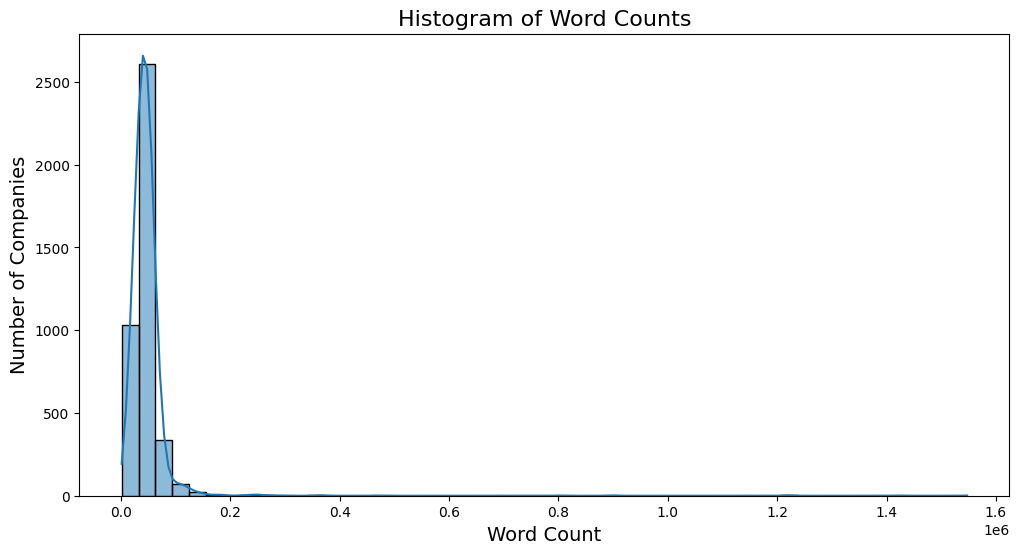

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Histogram of Word Counts', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.show()


# PER COMPANY PER QUARTER

In [22]:
import pandas as pd

# Assuming final_df is your DataFrame
data = final_df.copy()
df = pd.DataFrame(data)

# Calculate the number of words in each transcript
df['word_count'] = df['transcript'].apply(lambda x: len(str(x).split()))

# Group by quarter and calculate the average word count
average_word_count_per_quarter = df.groupby('quarter')['word_count'].mean().reset_index()

# Rename the columns for clarity
average_word_count_per_quarter.columns = ['quarter', 'average_word_count']

# Display the result
average_word_count_per_quarter


,quarter,average_word_count
0,2020Q1,48695.853659
1,2020Q2,47125.824769
2,2020Q3,42911.844173
3,2020Q4,47970.091329


# TOTAL AVERAGE WORD COUNT PER COMPANY OVER ALL QUARTERS

In [23]:
import pandas as pd

# Assuming final_df is your DataFrame
data = final_df.copy()
df = pd.DataFrame(data)

# Calculate the number of words in each transcript
df['word_count'] = df['transcript'].apply(lambda x: len(str(x).split()))

# Group by company and calculate the average word count
average_word_count_per_company = df.groupby('company')['word_count'].mean().reset_index()

# Rename the columns for clarity
average_word_count_per_company.columns = ['company', 'average_word_count']

# Display the result
average_word_count_per_company


,company,average_word_count
0,A,78800.25
1,AA,122610.00
2,AAIC,17992.00
3,AAL,64416.00
4,AAN,43123.00
...,...,...
2264,ZS,44757.00
2265,ZTS,62421.00
2266,ZUMZ,57798.00
2267,ZUO,36516.00
